### Imports

In [1]:
from sklearn.model_selection import train_test_split

from src.data_loader import load_pima
from src.preprocessing import replace_invalid_zeros, drop_missing_rows, mean_impute_train_test, median_impute_train_test, mode_impute_train_test
from src.modeling import train_logistic_regression
from src.evaluation import evaluate_model

### Load Data

In [2]:
df = load_pima()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Scenario 1: Raw Data

In [3]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = train_logistic_regression(X_train, y_train)
acc_raw, rec_raw, auc_raw = evaluate_model(model, X_test, y_test)

print("RAW DATA")
print("Accuracy:", acc_raw)
print("Recall:", rec_raw)
print("ROC-AUC:", auc_raw)

RAW DATA
Accuracy: 0.7467532467532467
Recall: 0.6727272727272727
ROC-AUC: 0.8128558310376492


### Scenario 2: Drop Missing Rows

In [4]:
df_clean = replace_invalid_zeros(df)
df_dropped = drop_missing_rows(df_clean)

X = df_dropped.drop("Outcome", axis=1)
y = df_dropped["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = train_logistic_regression(X_train, y_train)
acc_drop, rec_drop, auc_drop = evaluate_model(model, X_test, y_test)

print("DROP ROWS")
print("Accuracy:", acc_drop)
print("Recall:", rec_drop)
print("ROC-AUC:", auc_drop)

DROP ROWS
Accuracy: 0.7721518987341772
Recall: 0.5925925925925926
ROC-AUC: 0.8254985754985755


### Scenario 3: Mean Imputation

In [5]:
df_impute = replace_invalid_zeros(df)

X = df_impute.drop("Outcome", axis=1)
y = df_impute["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_imputed, X_test_imputed = mean_impute_train_test(X_train, X_test)

model = train_logistic_regression(X_train_imputed, y_train)
acc_mean, rec_mean, auc_mean = evaluate_model(model, X_test_imputed, y_test)

print("MEAN IMPUTATION")
print("Accuracy:", acc_mean)
print("Recall:", rec_mean)
print("ROC-AUC:", auc_mean)

MEAN IMPUTATION
Accuracy: 0.7532467532467533
Recall: 0.6181818181818182
ROC-AUC: 0.8222222222222222


### Scenario 4: Median Imputation

In [6]:
df_impute = replace_invalid_zeros(df)

X = df_impute.drop("Outcome", axis=1)
y = df_impute["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_imputed, X_test_imputed = median_impute_train_test(X_train, X_test)

model = train_logistic_regression(X_train_imputed, y_train)
acc_median, rec_median, auc_median = evaluate_model(model, X_test_imputed, y_test)

print("MEDIAN IMPUTATION")
print("Accuracy:", acc_median)
print("Recall:", rec_median)
print("ROC-AUC:", auc_median)

MEDIAN IMPUTATION
Accuracy: 0.7597402597402597
Recall: 0.6363636363636364
ROC-AUC: 0.820752984389348


### Scenario 5: Mode Imputation

In [7]:
df_impute = replace_invalid_zeros(df)

X = df_impute.drop("Outcome", axis=1)
y = df_impute["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_imputed, X_test_imputed = mode_impute_train_test(X_train, X_test)

model = train_logistic_regression(X_train_imputed, y_train)
acc_mode, rec_mode, auc_mode = evaluate_model(model, X_test_imputed, y_test)

print("MODE IMPUTATION")
print("Accuracy:", acc_mode)
print("Recall:", rec_mode)
print("ROC-AUC:", auc_mode)

MODE IMPUTATION
Accuracy: 0.7597402597402597
Recall: 0.6363636363636364
ROC-AUC: 0.8202020202020202


### Comparison Table

In [8]:
import pandas as pd

results_df = pd.DataFrame({
    "Method": ["Raw", "Drop Rows", "Mean", "Median", "Mode"],
    "Accuracy": [acc_raw, acc_drop, acc_mean, acc_median, acc_mode],
    "Recall": [rec_raw, rec_drop, rec_mean, rec_median, rec_mode]
})

results_df

,Method,Accuracy,Recall
0,Raw,0.746753,0.672727
1,Drop Rows,0.772152,0.592593
2,Mean,0.753247,0.618182
3,Median,0.759740,0.636364
4,Mode,0.759740,0.636364


### Simple bar chart (Accuracy)

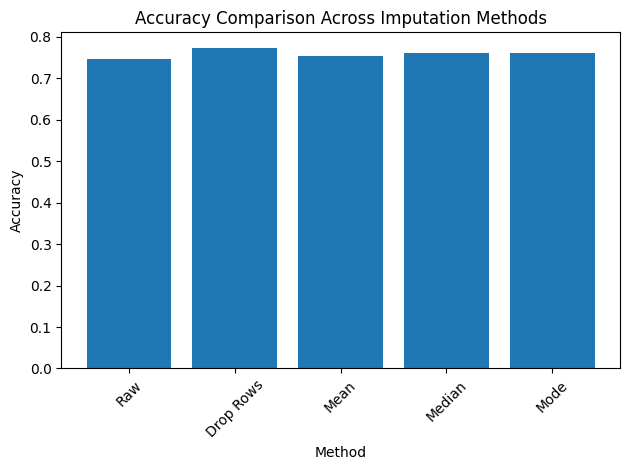

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results_df["Method"], results_df["Accuracy"])
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Across Imputation Methods")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Simple bar chart (Recall)

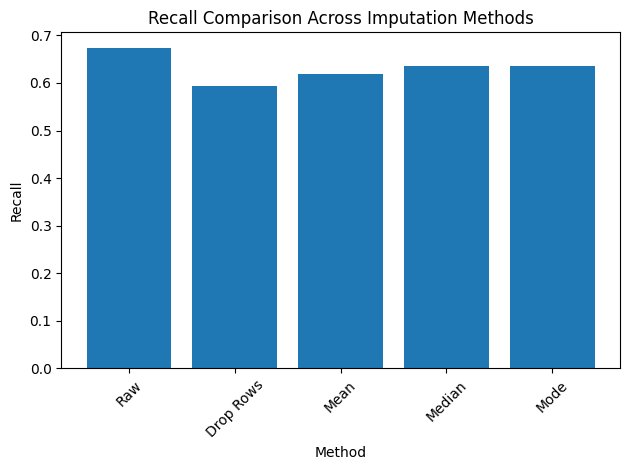

In [10]:
plt.figure()
plt.bar(results_df["Method"], results_df["Recall"])
plt.xlabel("Method")
plt.ylabel("Recall")
plt.title("Recall Comparison Across Imputation Methods")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### KNN Imputation

In [11]:
from src.knn_imputation import knn_impute_train_test

In [12]:
df_knn = replace_invalid_zeros(df)

X = df_knn.drop("Outcome", axis=1)
y = df_knn["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_knn, X_test_knn = knn_impute_train_test(X_train, X_test, n_neighbors=5)

model = train_logistic_regression(X_train_knn, y_train)
acc_knn, rec_knn, auc_knn = evaluate_model(model, X_test_knn, y_test)

print("KNN IMPUTATION")
print("Accuracy:", acc_knn)
print("Recall:", rec_knn)
print("ROC-AUC:", auc_knn)

KNN IMPUTATION
Accuracy: 0.7662337662337663
Recall: 0.6363636363636364
ROC-AUC: 0.815426997245179


### Comparison Table

In [13]:
results_df = pd.DataFrame({
    "Method": ["Raw", "Drop Rows", "Mean", "Median", "Mode", "KNN"],
    "Accuracy": [acc_raw, acc_drop, acc_mean, acc_median, acc_mode, acc_knn],
    "Recall": [rec_raw, rec_drop, rec_mean, rec_median, rec_mode, rec_knn]
})

results_df

,Method,Accuracy,Recall
0,Raw,0.746753,0.672727
1,Drop Rows,0.772152,0.592593
2,Mean,0.753247,0.618182
3,Median,0.759740,0.636364
4,Mode,0.759740,0.636364
5,KNN,0.766234,0.636364
